In [1]:
# Libreries

import scipy.io
from sklearn.metrics import pairwise_distances,adjusted_rand_score, silhouette_score
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from cluster.Spectral_V2 import SpectralClustering

In [2]:
mnist = scipy.io.loadmat("C:\\Users\\dimos\\PyProjecks\\Project_SVMs\\mnist_all.mat")

def load_data_mini(mat_data, key_prefix, L):
    data = []
    labels = []
    for i in range(10):
        digit_data = mat_data[f'{key_prefix}{i}']
        num_samples = min(L, digit_data.shape[0])
        sampled_data = digit_data[:num_samples]
        sampled_labels = np.full(num_samples, i)
        data.append(sampled_data)
        labels.append(sampled_labels)
    return np.vstack(data), np.hstack(labels)

X_m, y_mini = load_data_mini(mnist, 'train', 500)
print(X_m.shape)
print(y_mini.shape)

(5000, 784)
(5000,)


In [3]:
def normal(X_mini):
    #dedomeno oti einai gray scale eikones, max(xi)=255, min(xi)=0
    X_norm = 2*(X_mini/255) - 1
    return X_norm

X_mini = normal(X_m)

In [4]:
X_embedded = TSNE(random_state = 0, n_components=2,verbose=0).fit_transform(X_mini)

In [7]:
labels = SpectralClustering(n_clusters=11, affinity='nearest_neighbors', n_neighbors=100).fit(X_embedded) #nearest_neighbors

In [8]:
print(adjusted_rand_score(y_mini, labels))

0.700071299400557


0.6807778719374359

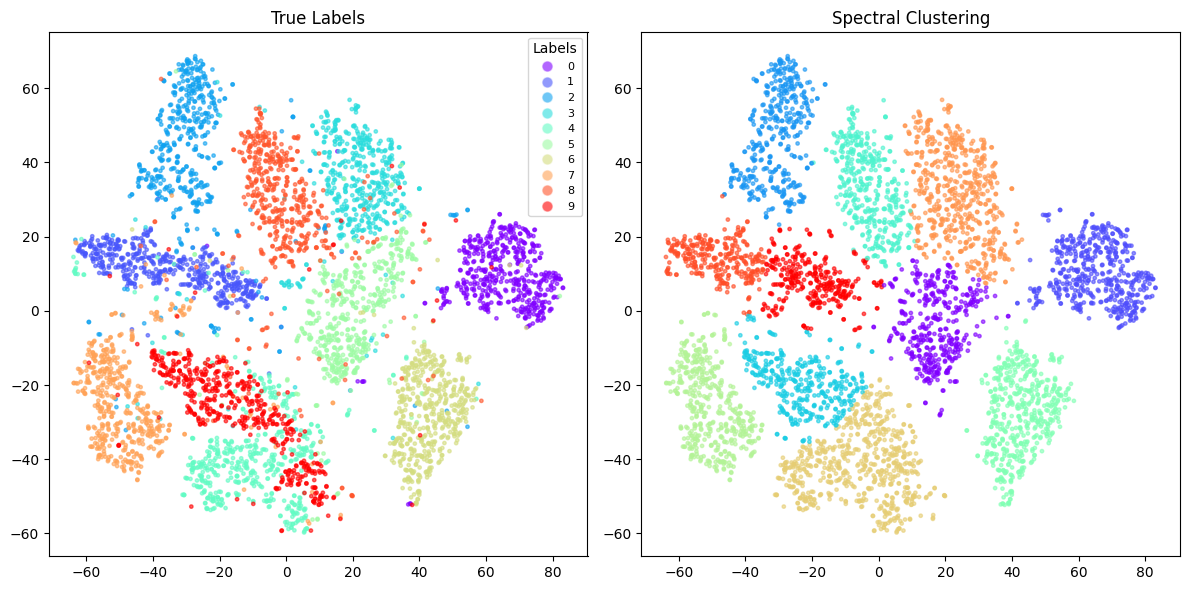

In [11]:

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
                         
# Plot true labels
scatter = axes[0].scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_mini, cmap='rainbow', s=6, alpha=0.6)
axes[0].set_title('True Labels')

# Create a legend for true labels
unique_labels = np.unique(y_mini)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), 
                      markersize=8, alpha=0.6) for label in unique_labels]
axes[0].legend(handles, unique_labels, title="Labels", loc='best', fontsize=8)

# Plot spectral clustering results
axes[1].scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='rainbow', s=6, alpha=0.6)
axes[1].set_title('Spectral Clustering')

# Show the plots
plt.tight_layout()
plt.show()

In [29]:
import os
import tensorflow as tf 
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from cluster.Spectral_V2 import SpectralClustering
from sklearn.metrics import silhouette_score
import time 

start_time = time.time()
number_of_clusters = 20
output_dir = "C:\\Users\\dimos\\PyProjecks\\t-SNE_Spectral_Clustering\\results\\Cifar-10"
os.makedirs(output_dir, exist_ok=True)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_mini = x_train[0:5000]
y_train_mini = y_train[0:5000]
x_train_m = x_train_mini.reshape(x_train_mini.shape[0], -1)
y_train_m = y_train_mini.reshape(y_train_mini.shape[0])

def normal(X_mini):
    #dedomeno oti einai gray scale eikones, max(xi)=255, min(xi)=0
    X_norm = 2*(X_mini/255) - 1
    return X_norm

X_mini =normal(x_train_m)

# Perform t-SNE
X_embedded = TSNE(random_state = 42, n_components=2,verbose=0).fit_transform(X_mini)

In [30]:
labels = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', n_neighbors=10).fit(X_embedded)

In [31]:
print(adjusted_rand_score(y_mini, y_train_m))

-0.0001232323021463212


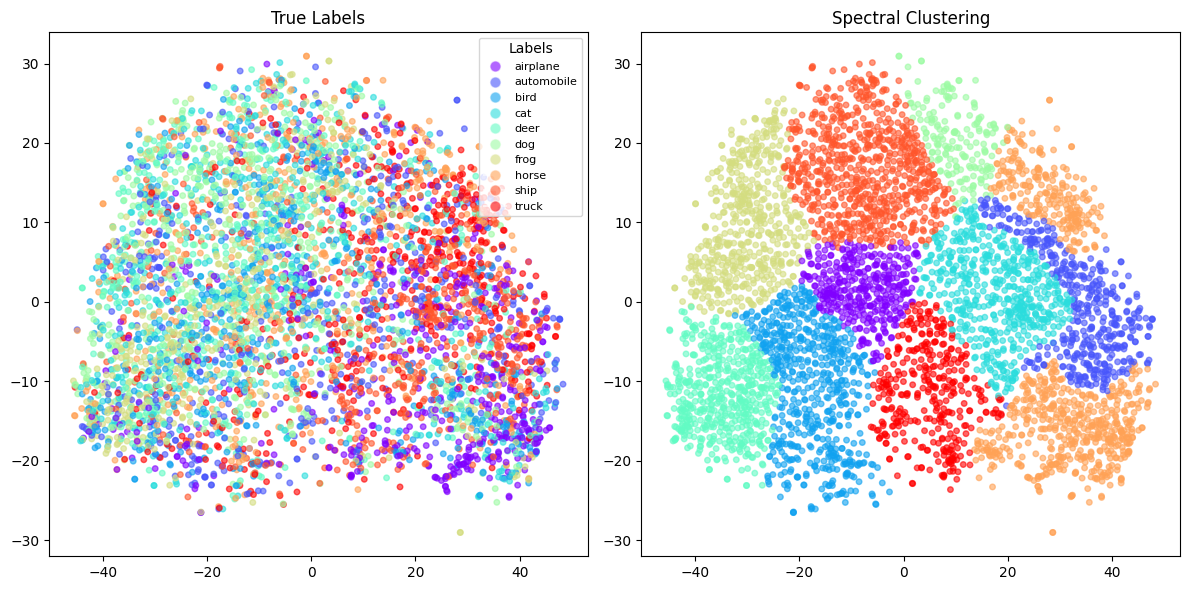

In [32]:
# CIFAR-10 class names
class_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Map numeric labels to class names
mapped_labels = [class_names[label] for label in y_train_m]

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot true labels with class names
scatter = axes[0].scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train_m, cmap='rainbow', s=16, alpha=0.6)
axes[0].set_title('True Labels')

# Create a legend for true labels with class names
unique_labels = np.unique(y_train_m)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), 
                      markersize=8, alpha=0.6) for label in unique_labels]
axes[0].legend(handles, [class_names[label] for label in unique_labels], title="Labels", loc='best', fontsize=8)

# Plot spectral clustering results
axes[1].scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='rainbow', s=16, alpha=0.6)
axes[1].set_title('Spectral Clustering')

# Show the plots
plt.tight_layout()
plt.show()


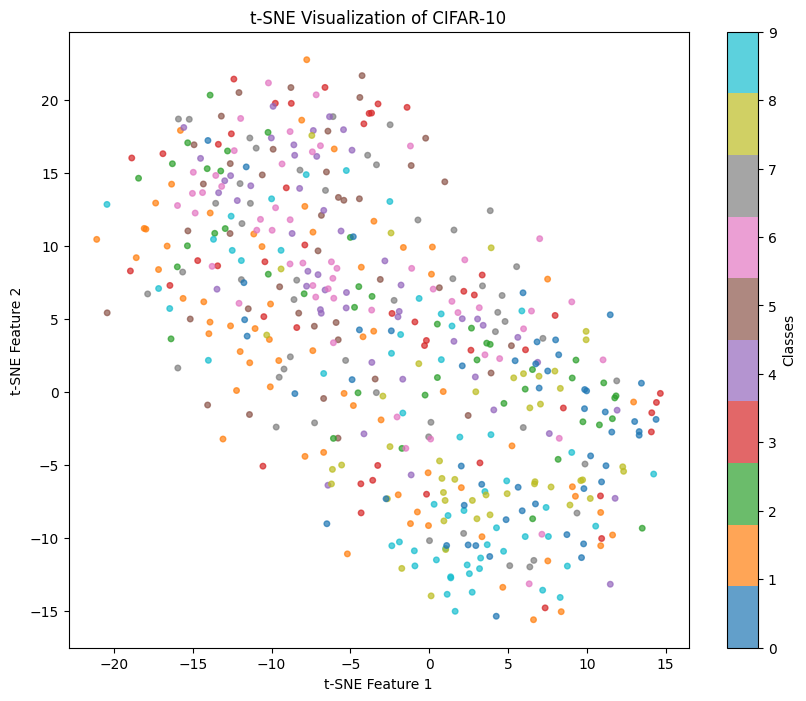

In [54]:
# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=1000, max_iter=1000, init='pca', random_state=42)

# Fit and transform the data
X_embedded = tsne.fit_transform(X_mini)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train_m, cmap='tab10', s=16, alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Classes')
plt.title("t-SNE Visualization of CIFAR-10")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.show()

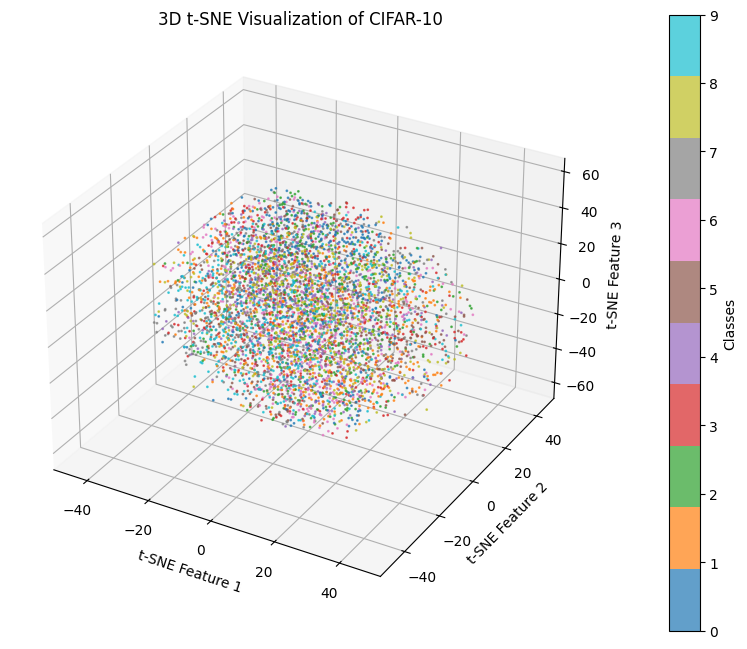

In [29]:
from mpl_toolkits.mplot3d import Axes3D

# Initialize t-SNE with 3 components
tsne = TSNE(n_components=3, perplexity=50, learning_rate=200, max_iter=1000, init='pca', random_state=42)

# Fit and transform the data
X_embedded = tsne.fit_transform(X_mini)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=y_train_m, cmap='tab10', s=1, alpha=0.7)

# Add labels and title
ax.set_title("3D t-SNE Visualization of CIFAR-10")
ax.set_xlabel("t-SNE Feature 1")
ax.set_ylabel("t-SNE Feature 2")
ax.set_zlabel("t-SNE Feature 3")

# Add a color bar to show label classes
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Classes")

plt.show()

In [30]:
labels = SpectralClustering(n_clusters=10, affinity='kneighbors', n_neighbors=500).fit(X_embedded)

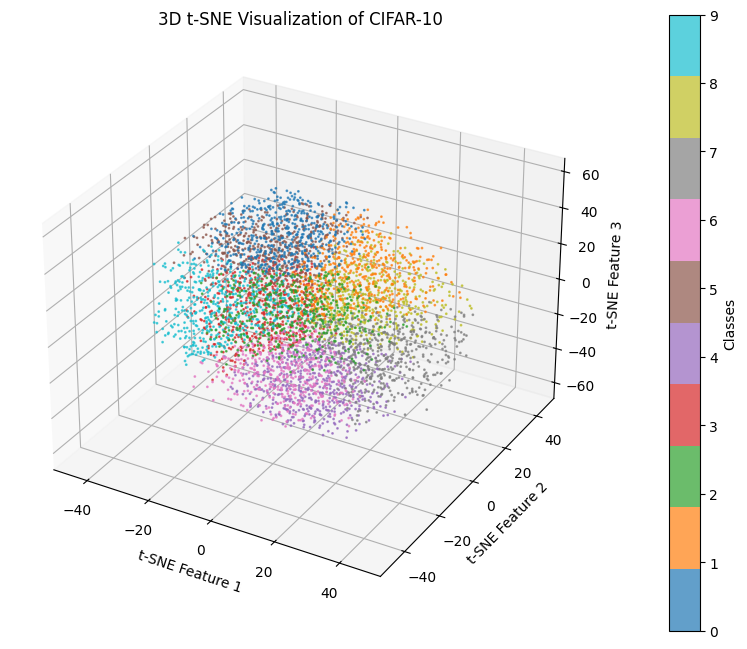

In [31]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=labels, cmap='tab10', s=1, alpha=0.7)

# Add labels and title
ax.set_title("3D t-SNE Visualization of CIFAR-10")
ax.set_xlabel("t-SNE Feature 1")
ax.set_ylabel("t-SNE Feature 2")
ax.set_zlabel("t-SNE Feature 3")

# Add a color bar to show label classes
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Classes")

plt.show()

Laplacian Eigenmaps

In [56]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.linalg import eigsh

# Create similarity graph (using k-NN)
n_neighbors = 10
W = kneighbors_graph(X_mini, n_neighbors=n_neighbors, mode='connectivity', include_self=False)

# Convert sparse matrix to dense adjacency matrix
W = W.toarray()

# Compute degree matrix
D = np.diag(np.sum(W, axis=1))

# Compute graph Laplacian
L = D - W

# Solve eigenvalue problem (smallest eigenvalues)
num_components = 2  # Reduce to 2 dimensions
eigvals, eigvecs = eigsh(L, k=num_components + 1, M=D, which='SM')

# Skip the first eigenvector (corresponding to eigenvalue 0)
embedding = eigvecs[:, 1:num_components + 1]

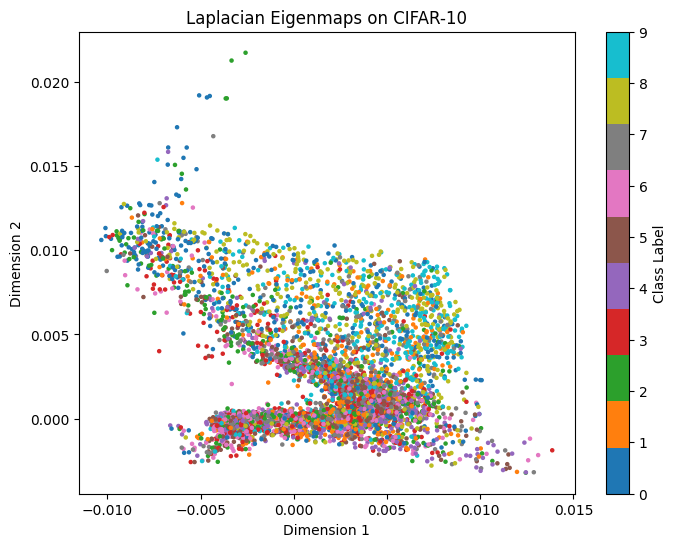

In [58]:
# Plot the embedding
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_train_m, cmap='tab10', s=5)
plt.colorbar(label='Class Label')
plt.title("Laplacian Eigenmaps on CIFAR-10")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

Graph Embedding

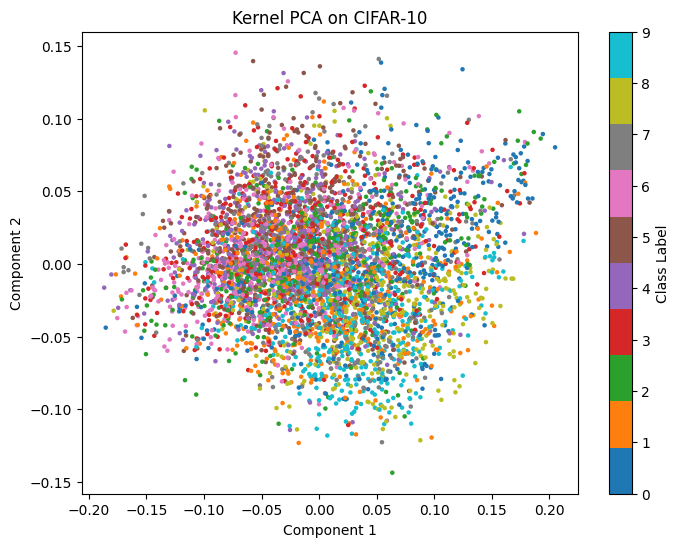

In [65]:
from sklearn.decomposition import KernelPCA

# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.00001)
X_kpca = kpca.fit_transform(X_mini)

# Plot the 2D embedding
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_train_m.flatten(), cmap='tab10', s=5)
plt.colorbar(label='Class Label')
plt.title("Kernel PCA on CIFAR-10")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

IsoMAP

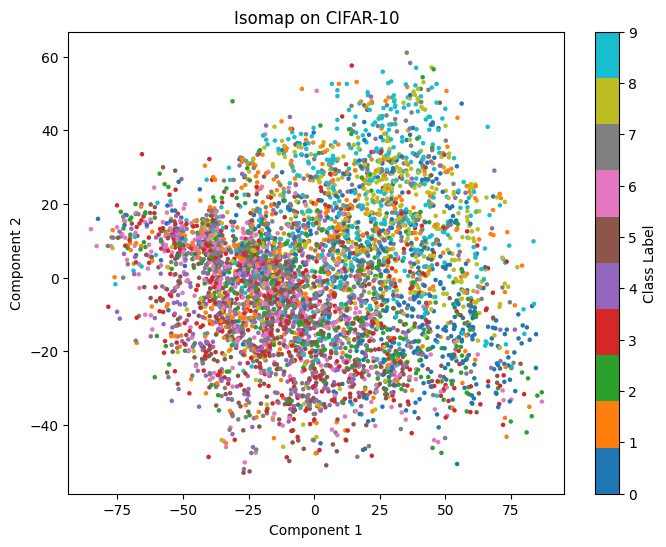

In [66]:
from sklearn.manifold import Isomap

# Apply Isomap
n_neighbors = 10  # Number of neighbors for geodesic distance
n_components = 2  # Reduce to 2D

isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
X_isomap = isomap.fit_transform(X_mini)

plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y_train_m.flatten(), cmap='tab10', s=5)
plt.colorbar(label='Class Label')
plt.title("Isomap on CIFAR-10")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

LLE

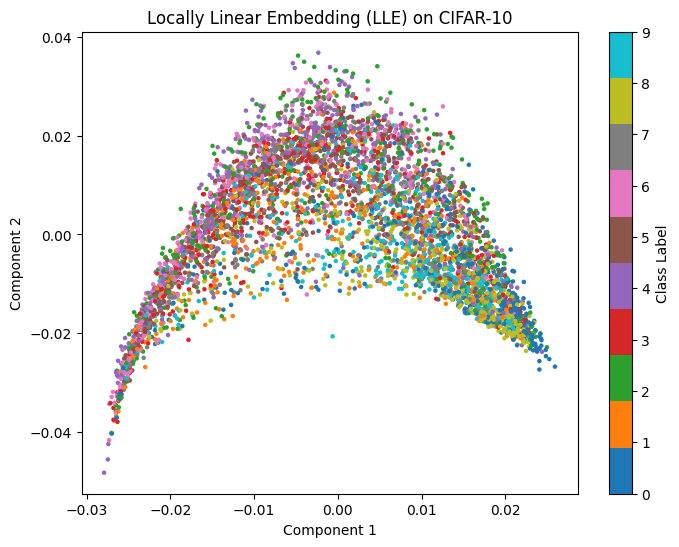

In [67]:
from sklearn.manifold import LocallyLinearEmbedding

# Apply LLE
n_neighbors = 10  # Number of neighbors to consider
n_components = 2  # Number of dimensions for output

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='standard')
X_lle = lle.fit_transform(X_mini)

plt.figure(figsize=(8, 6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_train_m.flatten(), cmap='tab10', s=5)
plt.colorbar(label='Class Label')
plt.title("Locally Linear Embedding (LLE) on CIFAR-10")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()